# Confidence Intervals - Lab

## Introduction

As we begin to talk about confidence intervals, it’s important to remember the difference between a **sample distribution** and a **sampling distribution**. 

Remember that a sample data distribution is the distribution of the data points within a single sample.  A sampling distribution is the probability distribution a statistic can take. Also recall that, by the Central Limit Theorem, the sampling distribution of the sample mean (x_hat) is approximately normal regardless of the shape of the original distribution of the variable.

As seen in a previous lab,  point estimates can provide some idea of a population parameter like the mean, but estimates are prone to error and also, taking multiple samples to get improved estimates may not be feasible all the time. 

## Objectives

You will be able to:

* Calculate confidence intervals
* Interpret confidence intervals in relation to true population parameters

## Data 

If we wanted to know the average age of registered voters in some elections, we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

In a previous lab, we saw that the sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's run a simulation to investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [1]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period. We shall use a Poisson distribution to construct a bimodal distribution.

In [2]:
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

Calculate the mean for the population and visualize the distribution. Also, describe the solution using five point statistics. (Hint: convert the population_ages array into a dataframe).

In [4]:

# Convert the population into a pandas dataframe pop_ages
pop_ages =pd.DataFrame({'age': population_ages})

# Calculate and print descriptive statistics for pop_ages
print("Descriptive Statistics for Population Ages:")
print("=" * 50)
stats_summary = pop_ages['age'].describe()
print(stats_summary)
print("\nThe mean of population is:", f"{pop_ages['age'].mean():.6f}")

# The mean of population is: 42.985332

# count	250000 
# mean	42.985332
# std	13.211628
# min	18.000000
# 25%	29.000000
# 50%	47.000000
# 75%	54.000000
# max	84.000000


Descriptive Statistics for Population Ages:
count    250000.000000
mean         42.985332
std          13.211628
min          18.000000
25%          29.000000
50%          47.000000
75%          54.000000
max          84.000000
Name: age, dtype: float64

The mean of population is: 42.985332


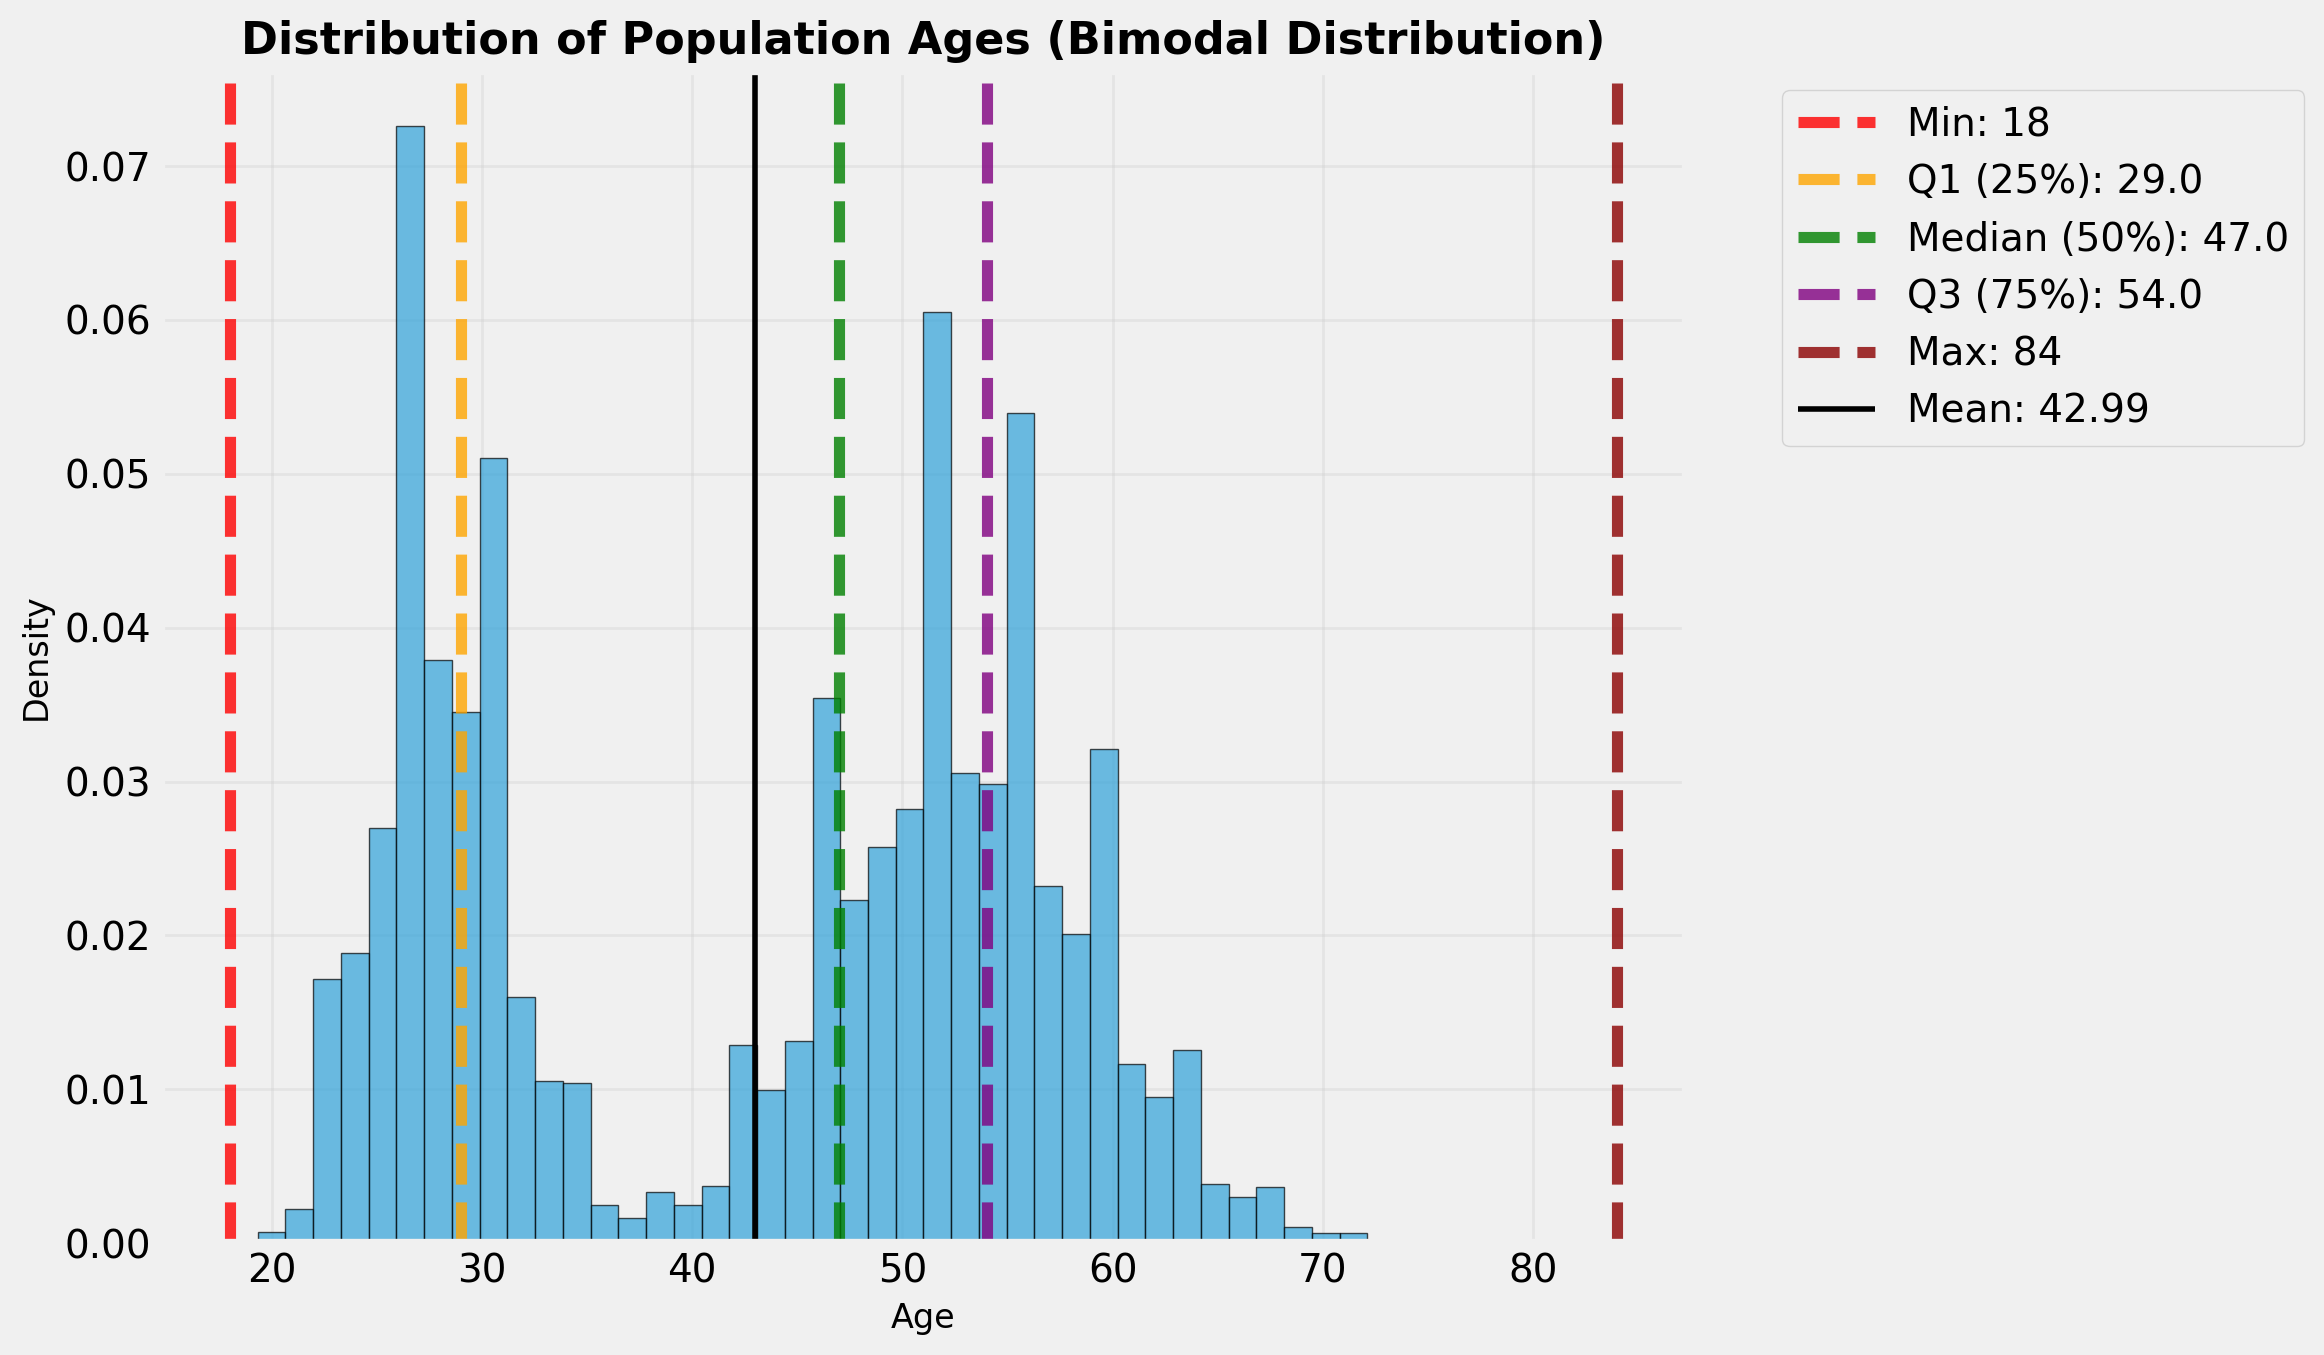

In [5]:
# Draw a histogram for pop ages
plt.figure(figsize=(12, 7))
plt.hist(pop_ages['age'], bins=50, color='#30a2da', alpha=0.7, edgecolor='black', density=True)
plt.title('Distribution of Population Ages (Bimodal Distribution)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)

# Add vertical lines for the five-point statistics
plt.axvline(pop_ages['age'].min(), color='red', linestyle='--', alpha=0.8, label=f'Min: {pop_ages["age"].min()}')
plt.axvline(pop_ages['age'].quantile(0.25), color='orange', linestyle='--', alpha=0.8, label=f'Q1 (25%): {pop_ages["age"].quantile(0.25):.1f}')
plt.axvline(pop_ages['age'].median(), color='green', linestyle='--', alpha=0.8, label=f'Median (50%): {pop_ages["age"].median():.1f}')
plt.axvline(pop_ages['age'].quantile(0.75), color='purple', linestyle='--', alpha=0.8, label=f'Q3 (75%): {pop_ages["age"].quantile(0.75):.1f}')
plt.axvline(pop_ages['age'].max(), color='darkred', linestyle='--', alpha=0.8, label=f'Max: {pop_ages["age"].max()}')
plt.axvline(pop_ages['age'].mean(), color='black', linestyle='-', linewidth=2, label=f'Mean: {pop_ages["age"].mean():.2f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Let's take a random sample of size 500 from this distribution and calculate the sample mean and standard deviation. Also, work out the difference between the population and sample mean. 

In [6]:
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = np.random.choice(population_ages, size=sample_size, replace=False)

# Calculate sample mean and standard deviation
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

print("Sample mean:", sample_mean)
print("Sample std.:", sample_std)
print("Difference between means:", population_ages.mean() - sample_mean)
#print ("Sample mean:", sample_mean)
#print ("Sample std.:", sample_std)
#print ("Difference between means:", population_ages.mean() - sample_mean)

# Sample mean: 43.49 
# Sample std.: 12.98529552994463
# Difference between means: -0.5046680000000023

Sample mean: 43.32
Sample std.: 13.32684544891395
Difference between means: -0.33466800000000063


We can see there is a small difference between sample mean and population mean. An increase in sample size can help reduce this difference. 

The central limit theorem states the distribution of **many sample means**, known as a **sampling distribution**, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed as we saw above. 

As a result, we can treat the sample mean as if it were drawn from a normal distribution. 

To illustrate, let's create a sampling distribution by taking 100 samples from our population and then making 100 point estimates of the mean. Calculate the mean and standard deviation of sample means.


Descriptive Statistics for Sampling Distribution (100 sample means):
count    100.000000
mean      43.066640
std        0.605837
min       41.794000
25%       42.596000
50%       43.094000
75%       43.400000
max       44.384000
Name: sample_means, dtype: float64

Population mean: 42.985332
Mean of sample means: 43.066640
Difference: -0.081308


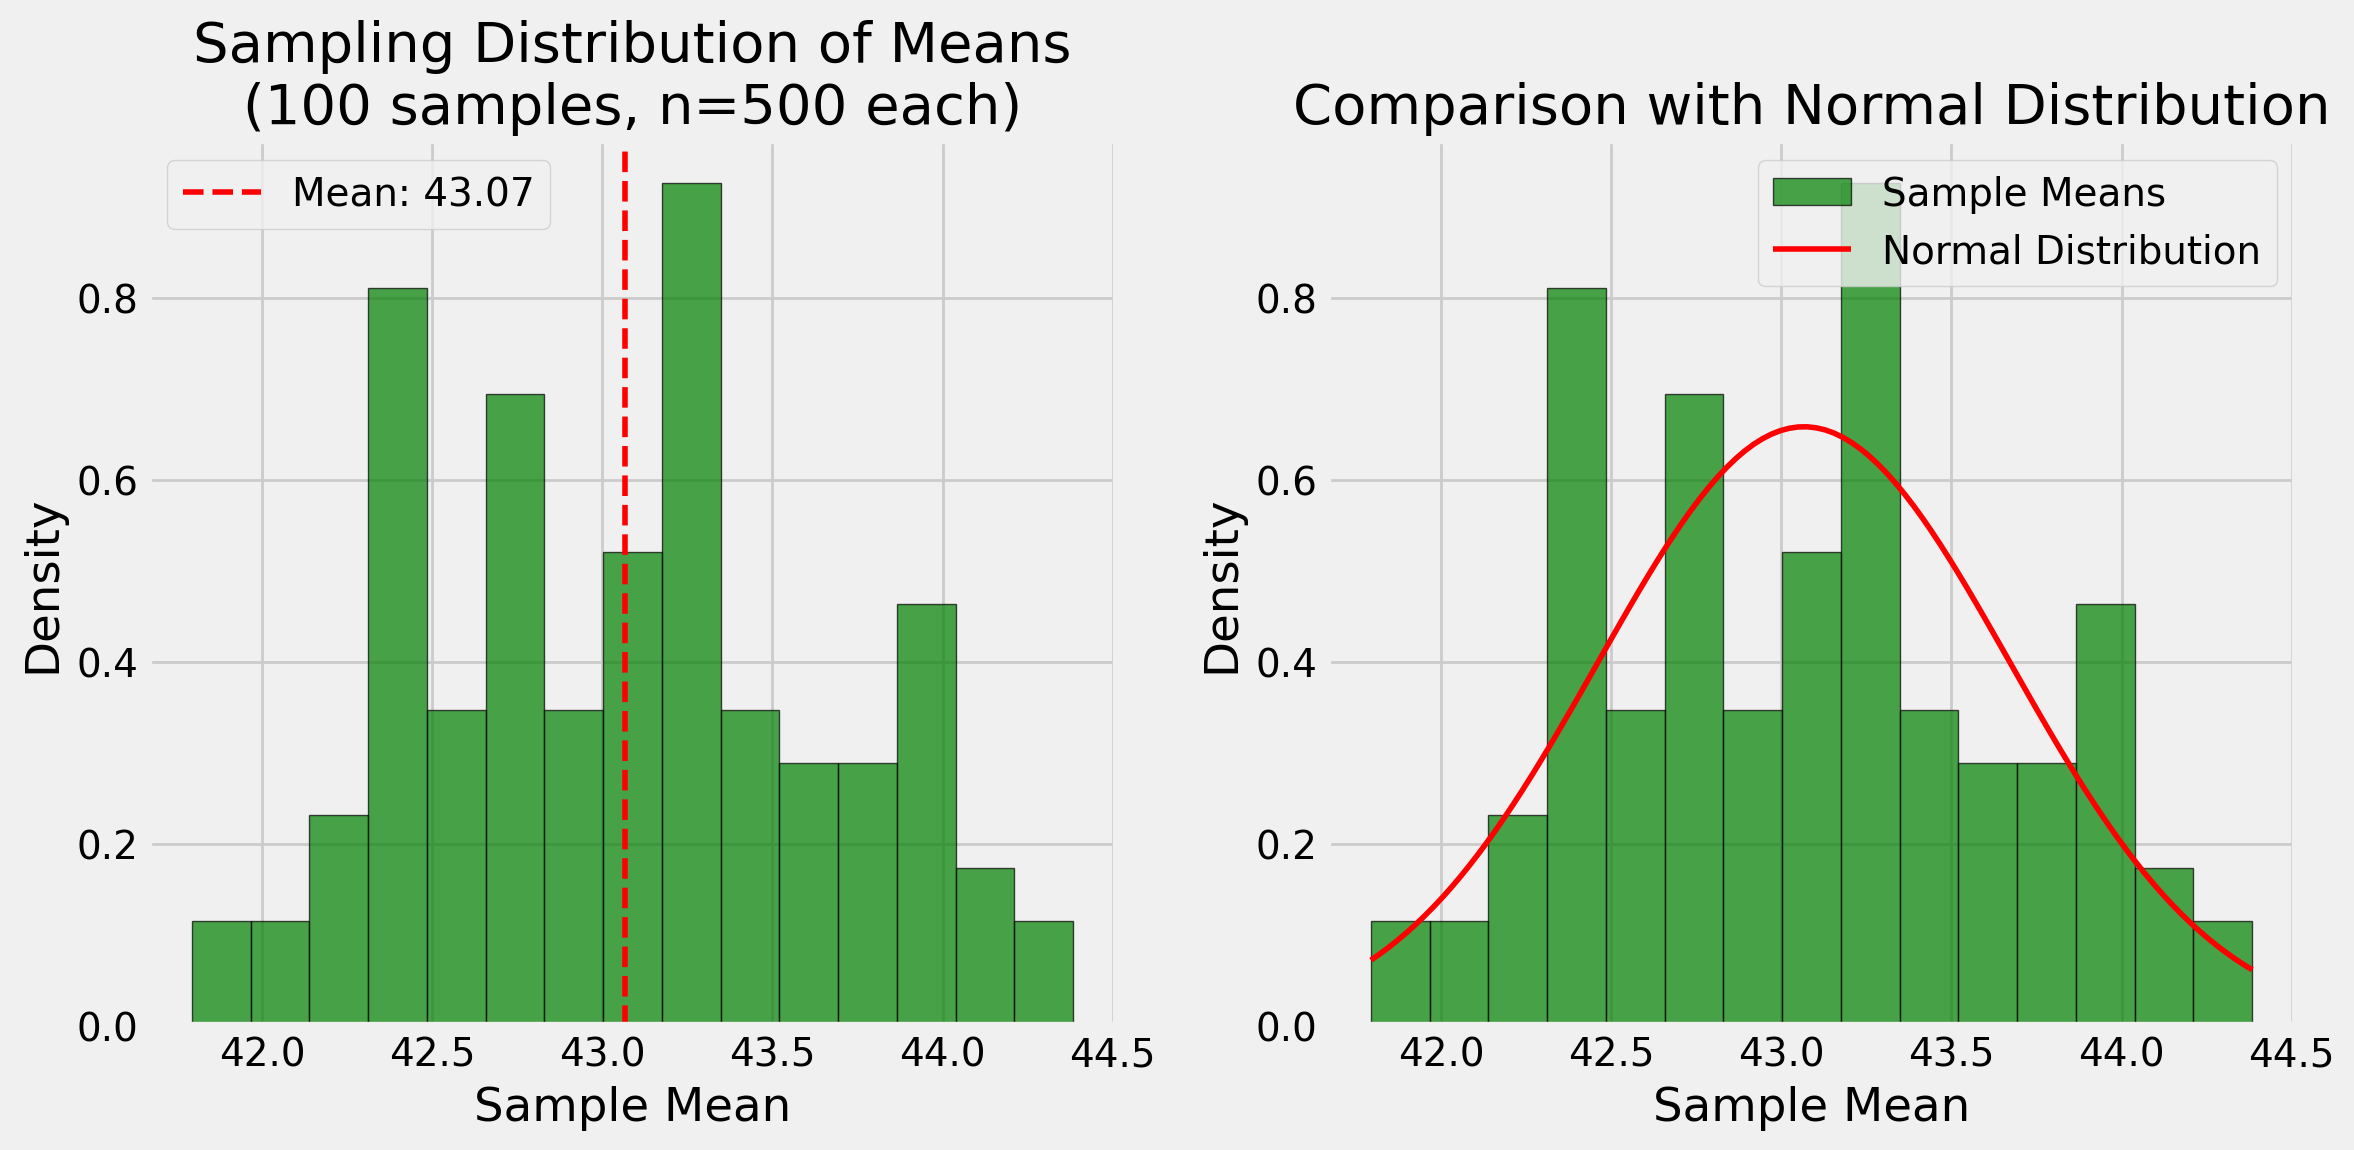


Theoretical Standard Error (σ/√n): 0.590841
Actual Std of Sample Means: 0.605837
Difference: 0.014996


In [7]:
np.random.seed(15)

point_estimates = []         # Make empty list to hold point estimates

# Take 100 samples and generate 100 point estimates using a for loop.
for _ in range(100):
    sample = np.random.choice(population_ages, size=500, replace=False)
    point_estimates.append(np.mean(sample))

# Convert the point_estimates into a pandas dataframe
sampling_distribution = pd.DataFrame({'sample_means': point_estimates})

# Calculate and print descriptive statistics for the dataframe
print("Descriptive Statistics for Sampling Distribution (100 sample means):")
print("=" * 70)
stats_summary = sampling_distribution['sample_means'].describe()
print(stats_summary)

# Additional analysis
print(f"\nPopulation mean: {population_ages.mean():.6f}")
print(f"Mean of sample means: {sampling_distribution['sample_means'].mean():.6f}")
print(f"Difference: {population_ages.mean() - sampling_distribution['sample_means'].mean():.6f}")

# Visualize the sampling distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sampling_distribution['sample_means'], bins=15, alpha=0.7, color='green', 
         edgecolor='black', density=True)
plt.axvline(sampling_distribution['sample_means'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {sampling_distribution["sample_means"].mean():.2f}')
plt.title('Sampling Distribution of Means\n(100 samples, n=500 each)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
# Compare with normal distribution
from scipy.stats import norm
x = np.linspace(sampling_distribution['sample_means'].min(), sampling_distribution['sample_means'].max(), 100)
pdf = norm.pdf(x, loc=sampling_distribution['sample_means'].mean(), 
               scale=sampling_distribution['sample_means'].std())
plt.hist(sampling_distribution['sample_means'], bins=15, alpha=0.7, color='green', 
         edgecolor='black', density=True, label='Sample Means')
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')
plt.title('Comparison with Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the standard error theoretically and compare
theoretical_std_err = population_ages.std() / np.sqrt(500)
print(f"\nTheoretical Standard Error (σ/√n): {theoretical_std_err:.6f}")
print(f"Actual Std of Sample Means: {sampling_distribution['sample_means'].std():.6f}")
print(f"Difference: {abs(theoretical_std_err - sampling_distribution['sample_means'].std()):.6f}")


# Convert the point_estimates into a pandas dataframe
# Calculate and print descriptive statistics for the dataframe

# count	100.000000
# mean	42.959380
# std	0.586404
# min	41.296000
# 25%	42.530000
# 50%	42.960000
# 75%	43.356000
# max	44.492000


Let's visualize the distribution of sample means to check for normality.

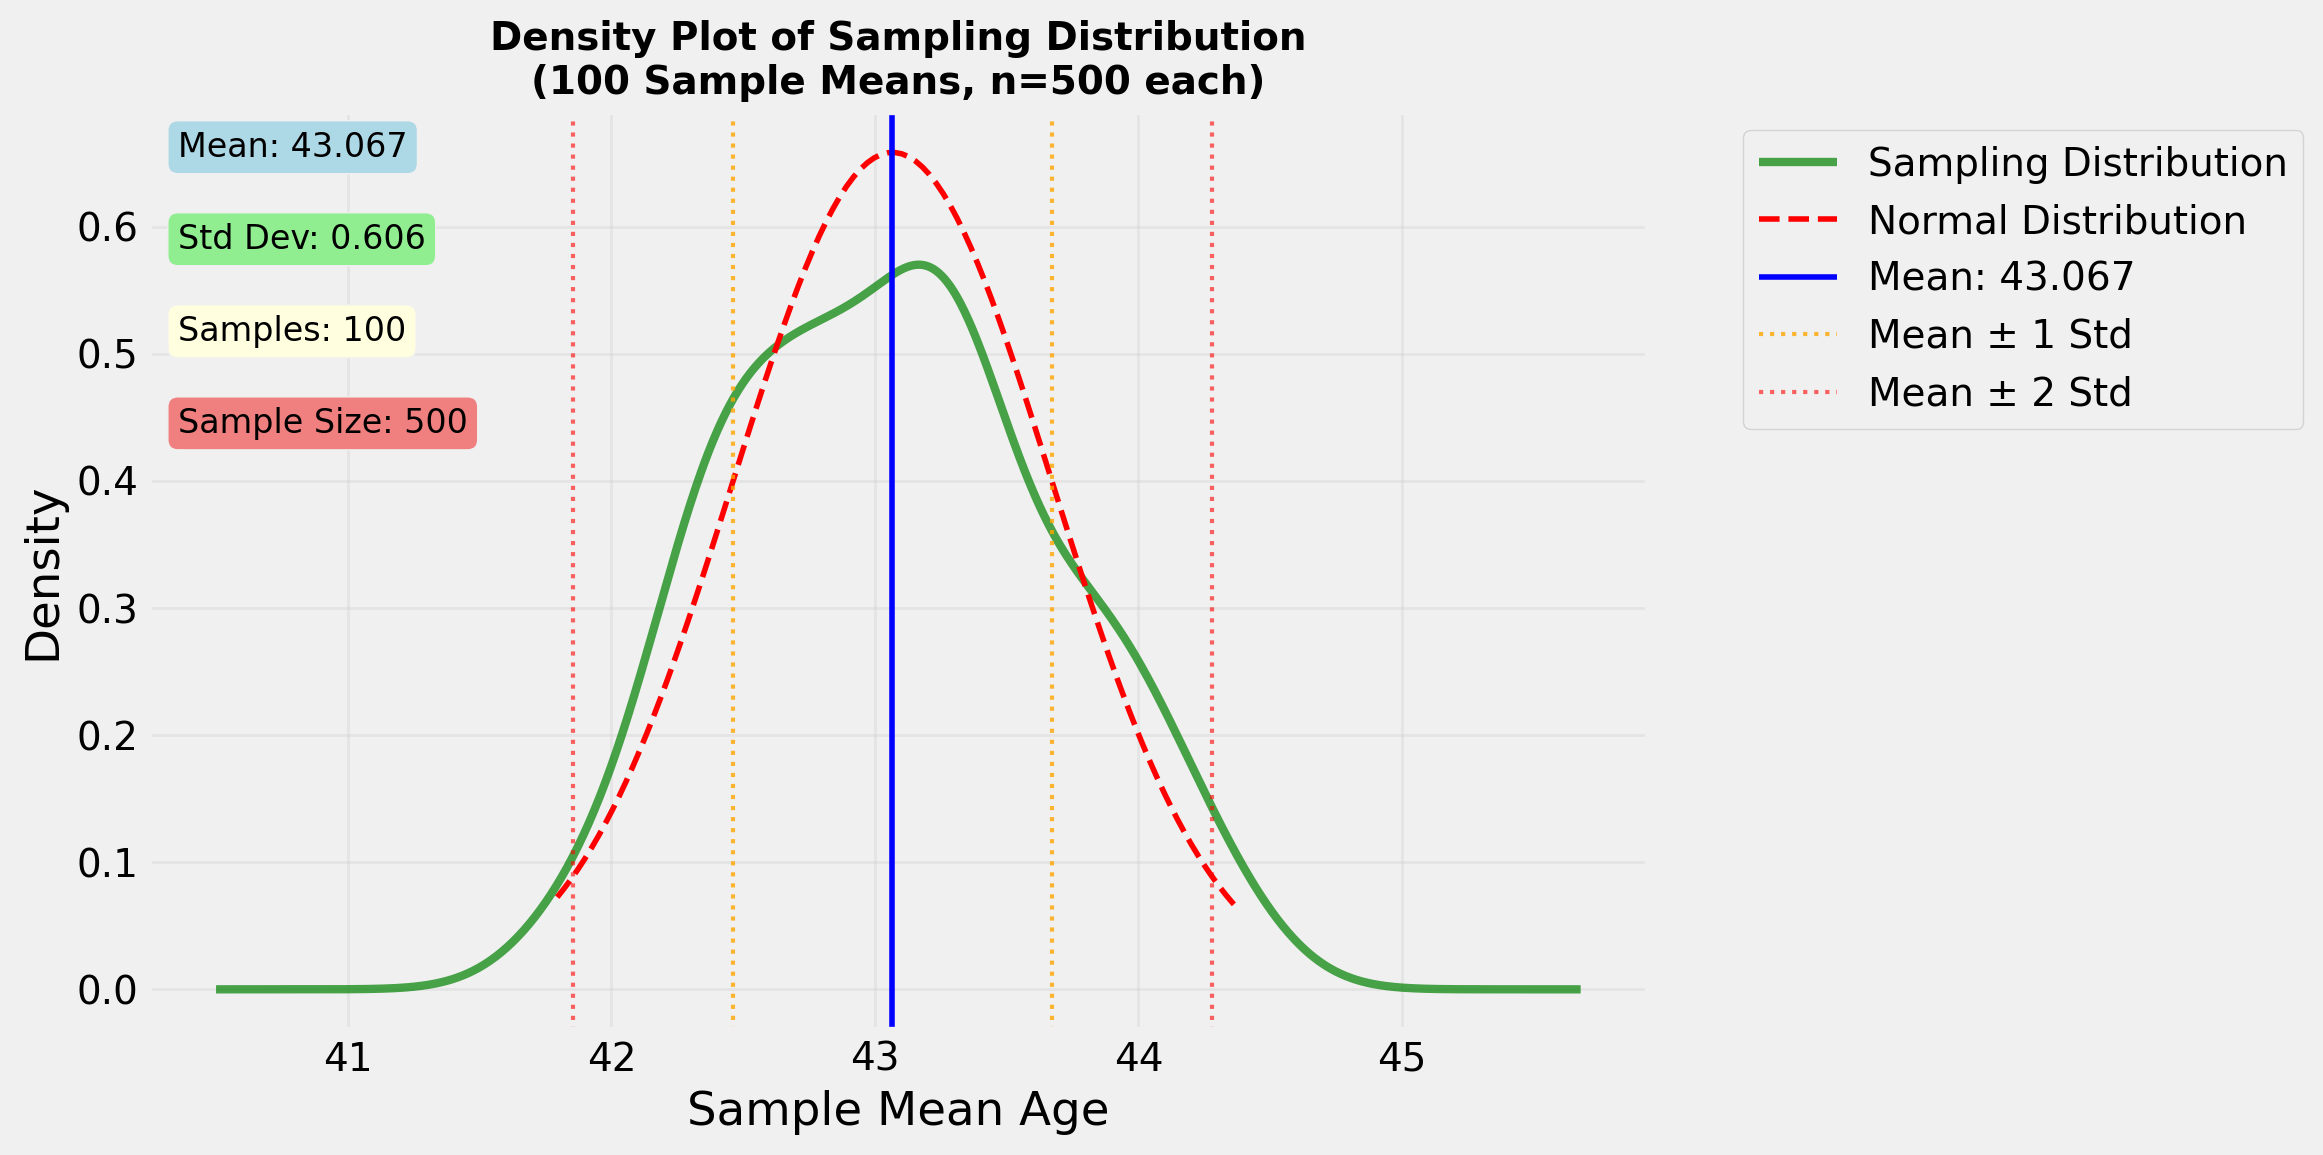

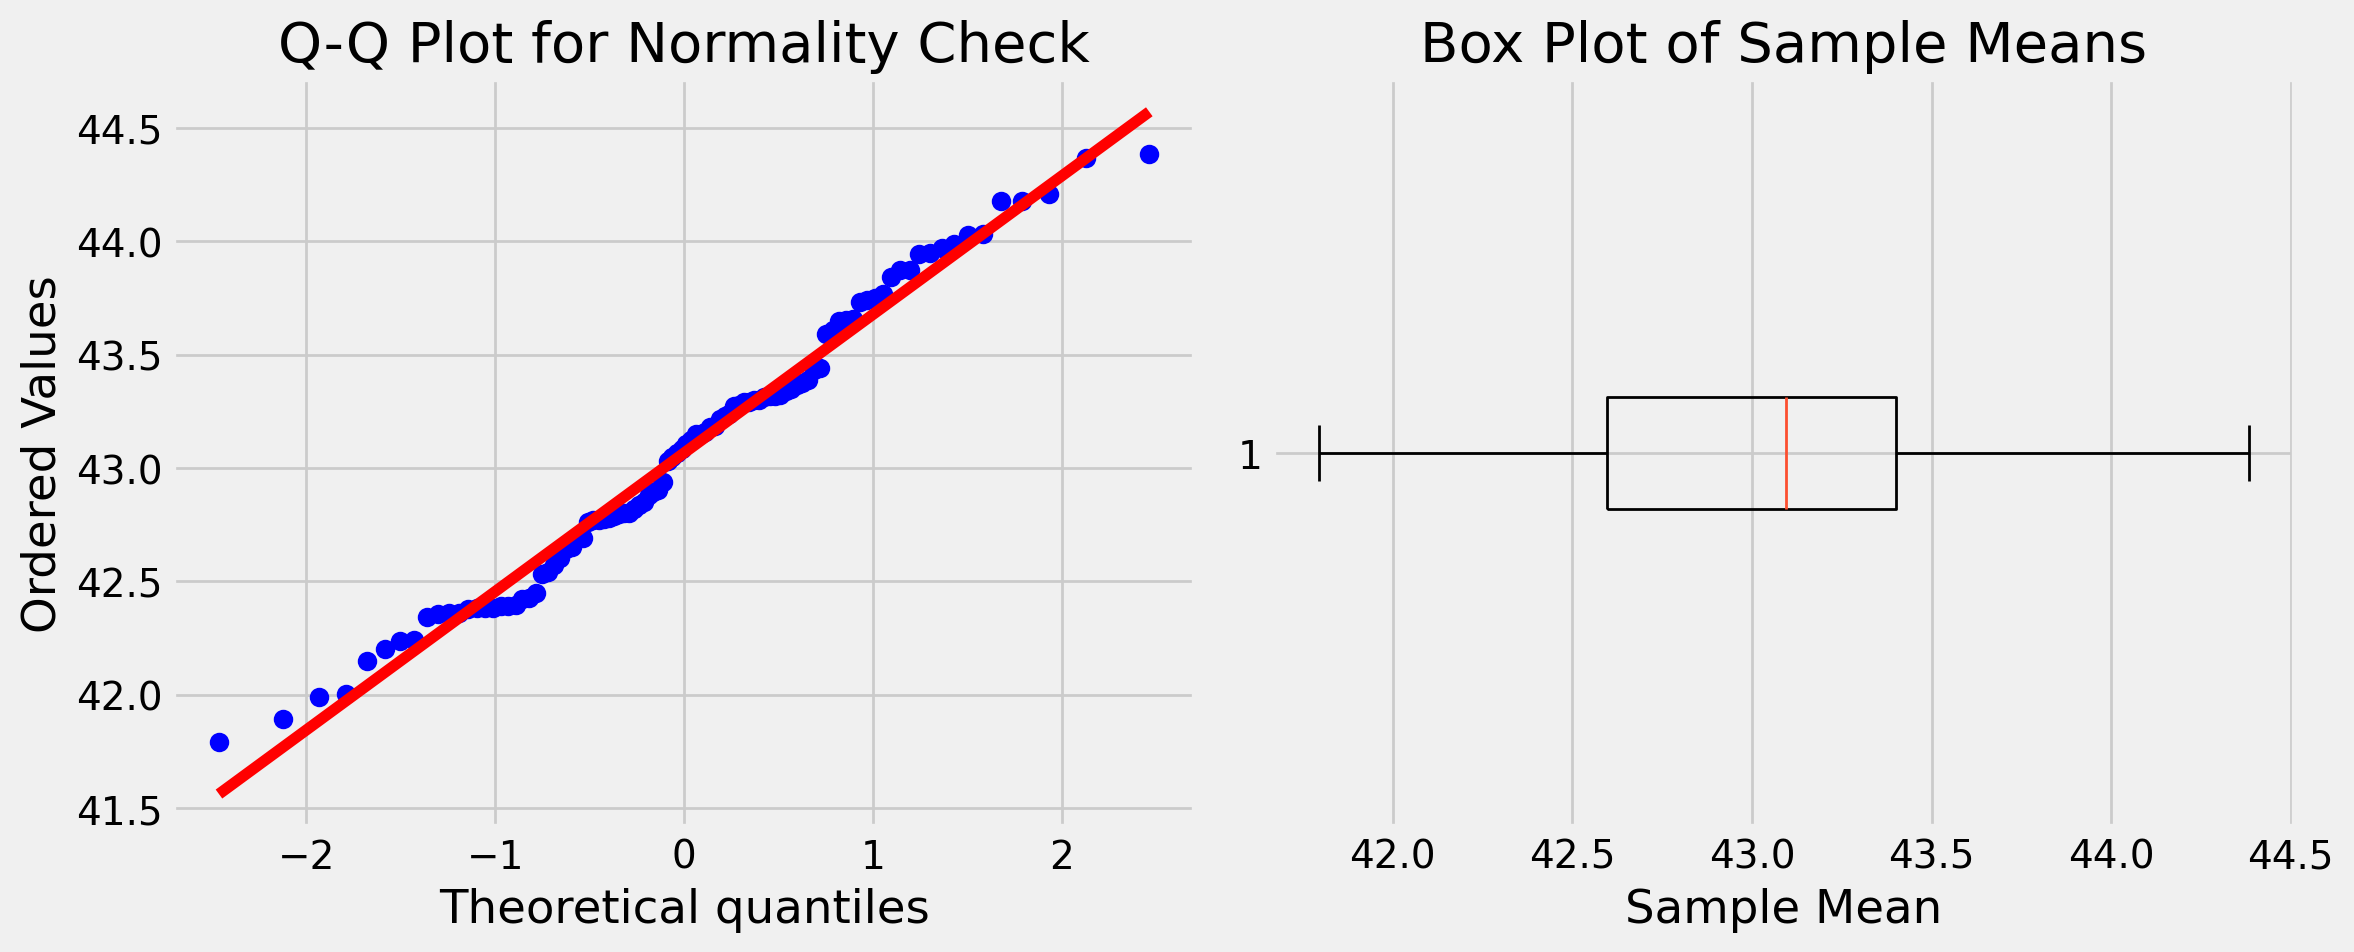


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9809
P-value: 0.1554
Conclusion: Fail to reject null hypothesis - data appears normally distributed


In [8]:
#Visualize the point estimates by plotting a density plot (use pandas)
# Create the density plot for the sampling distribution
plt.figure(figsize=(12, 6))

# Plot the density using pandas
sampling_distribution['sample_means'].plot(kind='density', color='green', linewidth=3, 
                                          alpha=0.7, label='Sampling Distribution')

# Overlay a normal distribution with the same mean and std for comparison
from scipy.stats import norm
x = np.linspace(sampling_distribution['sample_means'].min(), sampling_distribution['sample_means'].max(), 100)
pdf = norm.pdf(x, loc=sampling_distribution['sample_means'].mean(), 
               scale=sampling_distribution['sample_means'].std())
plt.plot(x, pdf, 'r--', linewidth=2, label='Normal Distribution')

# Add vertical lines for mean and ±1, ±2 standard deviations
mean_val = sampling_distribution['sample_means'].mean()
std_val = sampling_distribution['sample_means'].std()

plt.axvline(mean_val, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.3f}')
plt.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5, alpha=0.8, label='Mean ± 1 Std')
plt.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5, alpha=0.8)
plt.axvline(mean_val + 2*std_val, color='red', linestyle=':', linewidth=1.5, alpha=0.6, label='Mean ± 2 Std')
plt.axvline(mean_val - 2*std_val, color='red', linestyle=':', linewidth=1.5, alpha=0.6)

# Add title and labels
plt.title('Density Plot of Sampling Distribution\n(100 Sample Means, n=500 each)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Mean Age')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Add some statistical annotations
plt.text(0.02, 0.95, f'Mean: {mean_val:.3f}', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(0.02, 0.85, f'Std Dev: {std_val:.3f}', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.text(0.02, 0.75, f'Samples: 100', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
plt.text(0.02, 0.65, f'Sample Size: 500', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.tight_layout()
plt.show()

# Additional normality check using Q-Q plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(sampling_distribution['sample_means'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.subplot(1, 2, 2)
# Box plot to check symmetry
plt.boxplot(sampling_distribution['sample_means'], vert=False)
plt.title('Box Plot of Sample Means')
plt.xlabel('Sample Mean')

plt.tight_layout()
plt.show()

# Statistical test for normality (Shapiro-Wilk test)
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(sampling_distribution['sample_means'])
print(f"\nShapiro-Wilk Test for Normality:")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Conclusion: Fail to reject null hypothesis - data appears normally distributed")
else:
    print("Conclusion: Reject null hypothesis - data does not appear normally distributed")

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. This is where the central limit theorem comes into play. In addition, the mean of the sampling distribution approaches the true population mean. The more samples we take, the better our estimate of the population parameter is likely to be. 

## What is a Confidence Interval?

A **Confidence Interval** is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we **want** to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. *Higher confidence levels result in wider confidence intervals.*

We calculate a confidence interval by taking a point estimate and then adding and subtracting a **margin of error** to create a range. The margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

The margin of error for a known population standard deviation is:

> **Margin of Error = z ∗ σ / √n**

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. 

>The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval as shown in this image:
<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-confidence-intervals-lab/master/images/normal_distribution.png" alt="Illustration of a normal distribution which shows that about 95% of the data will fall within 2 standard deviations of the mean">

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -2.575 and 2.575.

It is more suitable to get z-critical values with `stats.norm.ppf()` as the results are more accurate.
> **`stats.norm.ppf(q, loc=0, scale=1)`**	is a percent point function (inverse of cdf — percentiles).

Create a function to input population and sample data to calculate the confidence intervals:

In [9]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = stats.norm.ppf(0.975)  # z-critical value for 95% confidence

    # Calculate the population std from data
    pop_stdev = pop.std()

    # Calculate the margin of error using formula given above
    moe = z * (pop_stdev / np.sqrt(n))

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
print("z-critical value:")              
print(z_critical)         
print('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)
# Call above function with sample and population 
#z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
    

# print("z-critical value:")              
# print(z_critical)         
# print ('\nMargin of error')
# print(margin_of_error)
# print("\nConfidence interval:")
# print(confidence_interval)

# z-critical value:
# 1.959963984540054

# Margin of error
# 1.158026699800684

# Confidence interval:
# (41.86997330019931, 44.186026699800685)

z-critical value:
1.959963984540054

Margin of error
1.158026699800684

Confidence interval:
(np.float64(42.43197330019932), np.float64(44.74802669980069))


> Note that with calculated confidence intervals, we captured the true population mean of 42.9

We can create several such confidence intervals and visualize them to get a better sense of what it means to "capture" the true mean. 

Let's set a sample size of 1000 and take 25 samples to calculate the confidence intervals using the function above. 

Population mean: 42.9853
Number of confidence intervals that contain the population mean: 24/25
Percentage: 96.0%


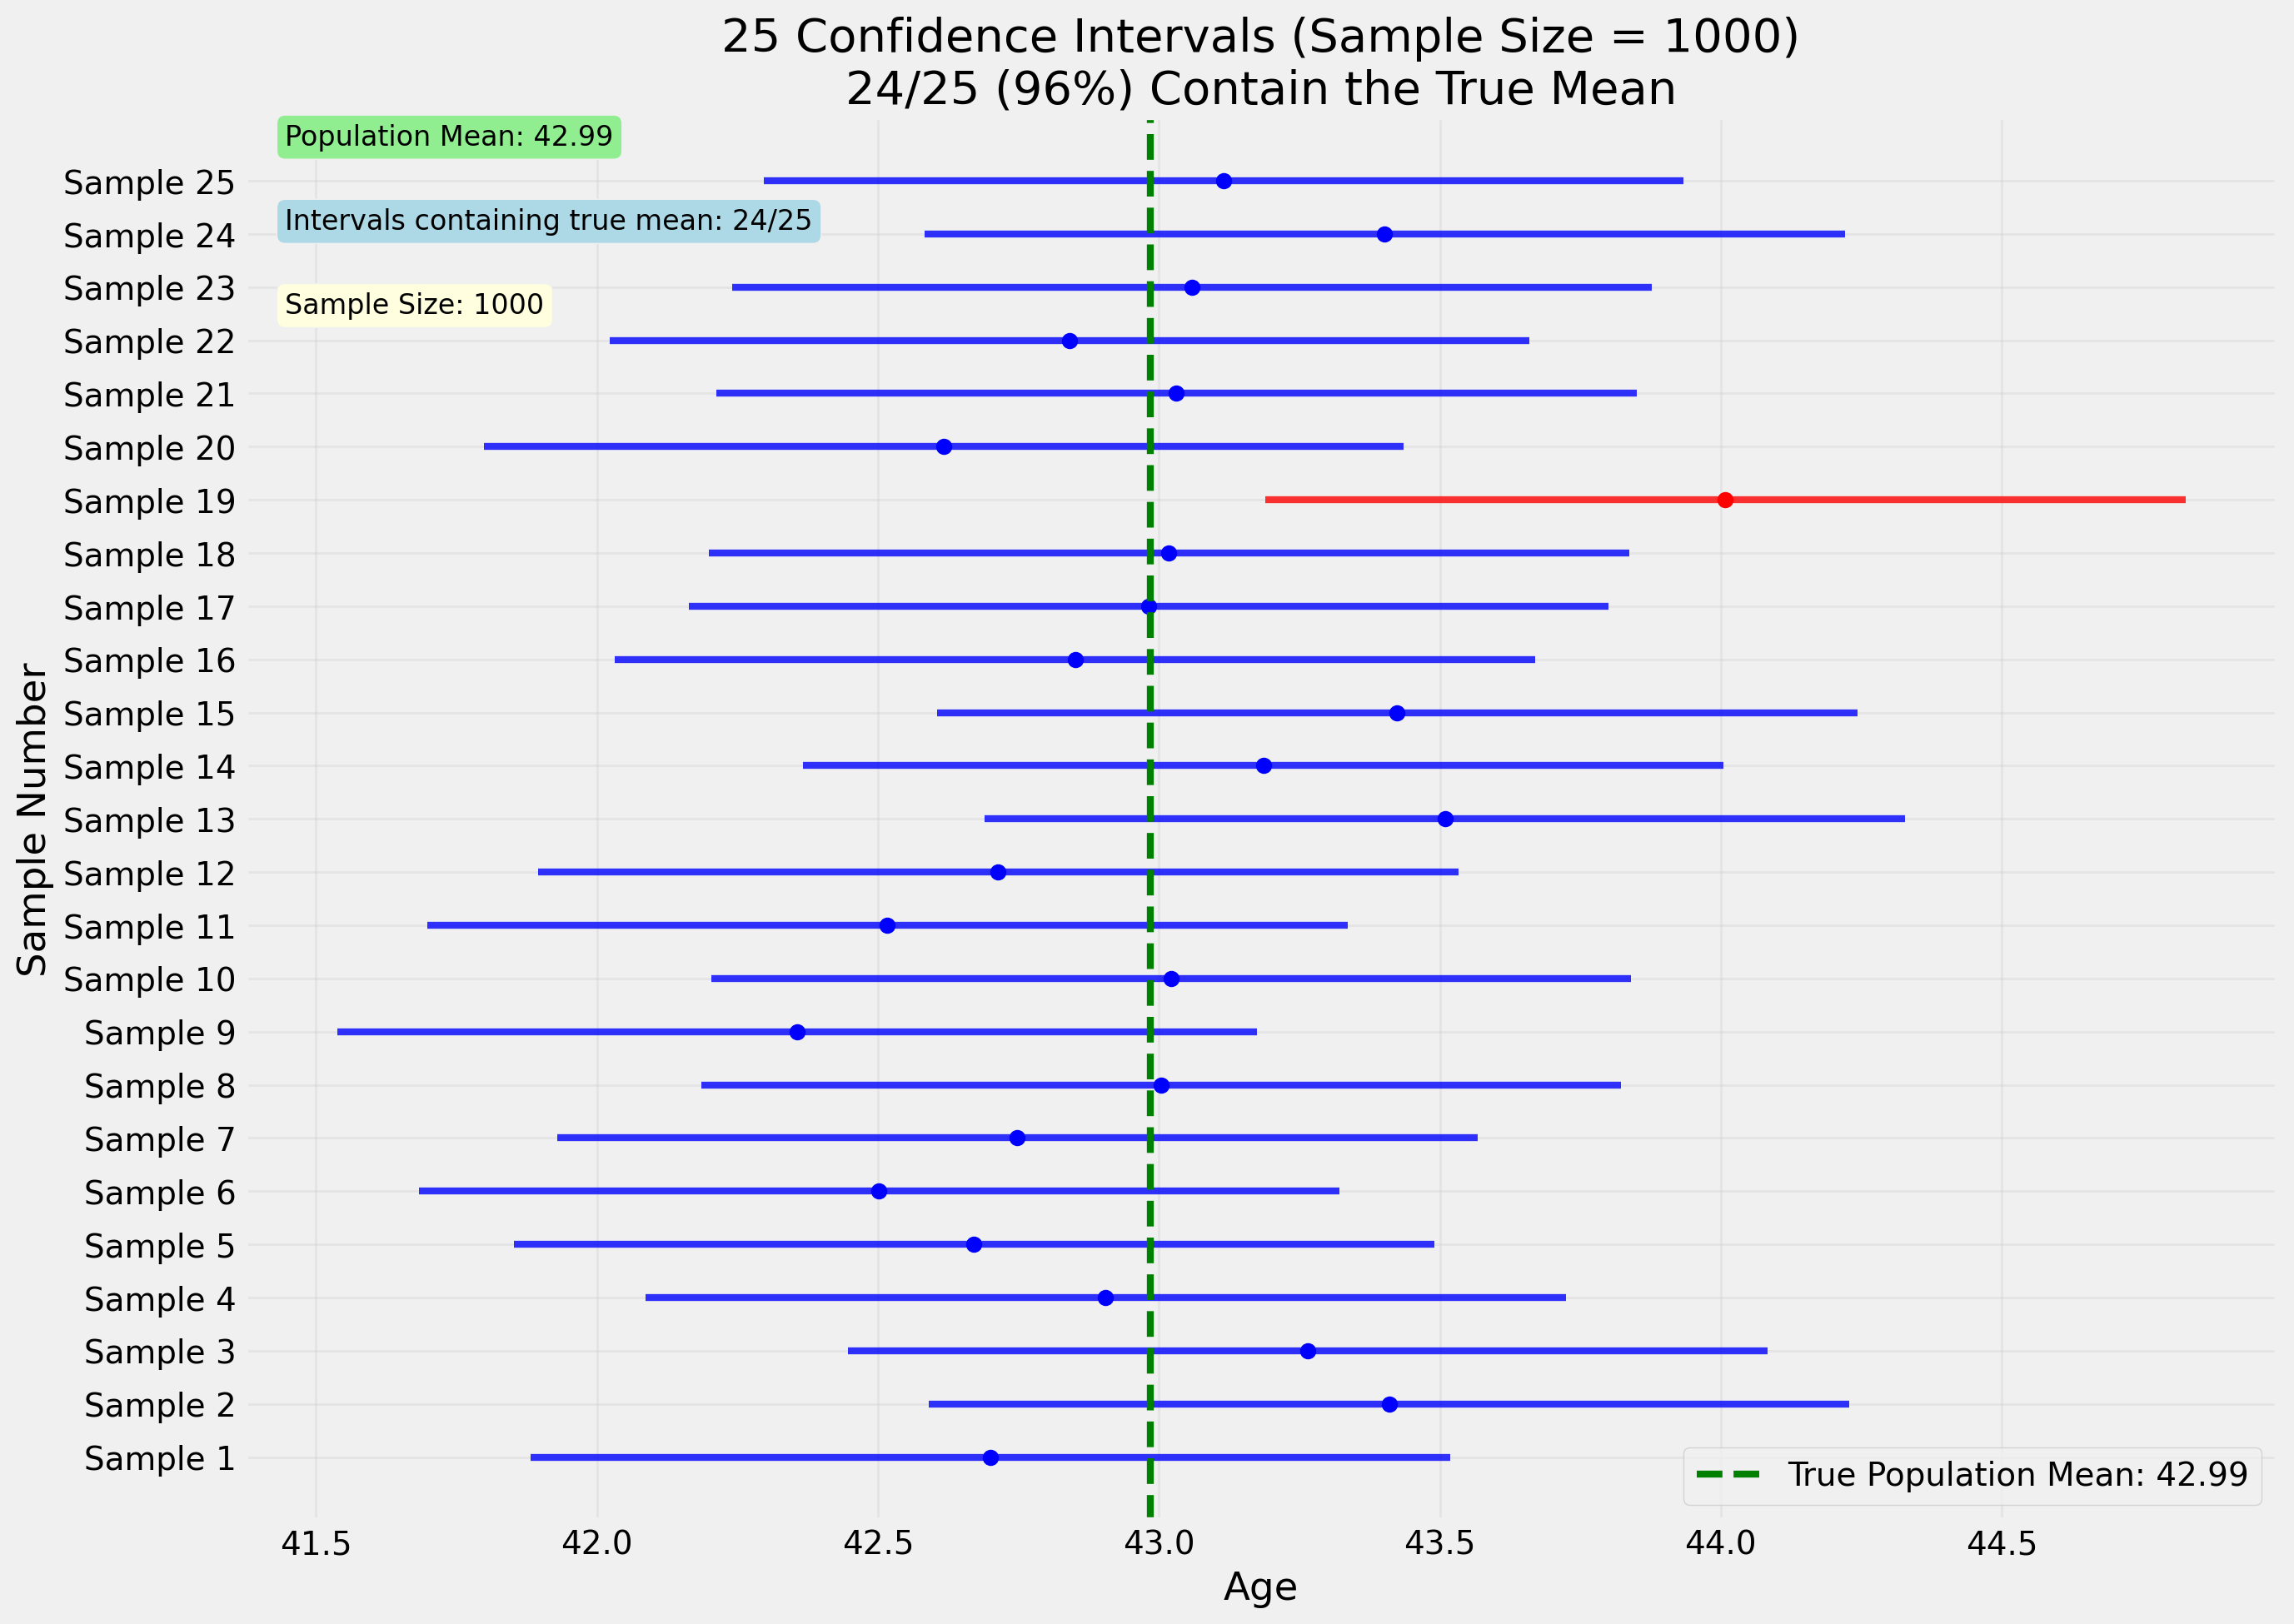

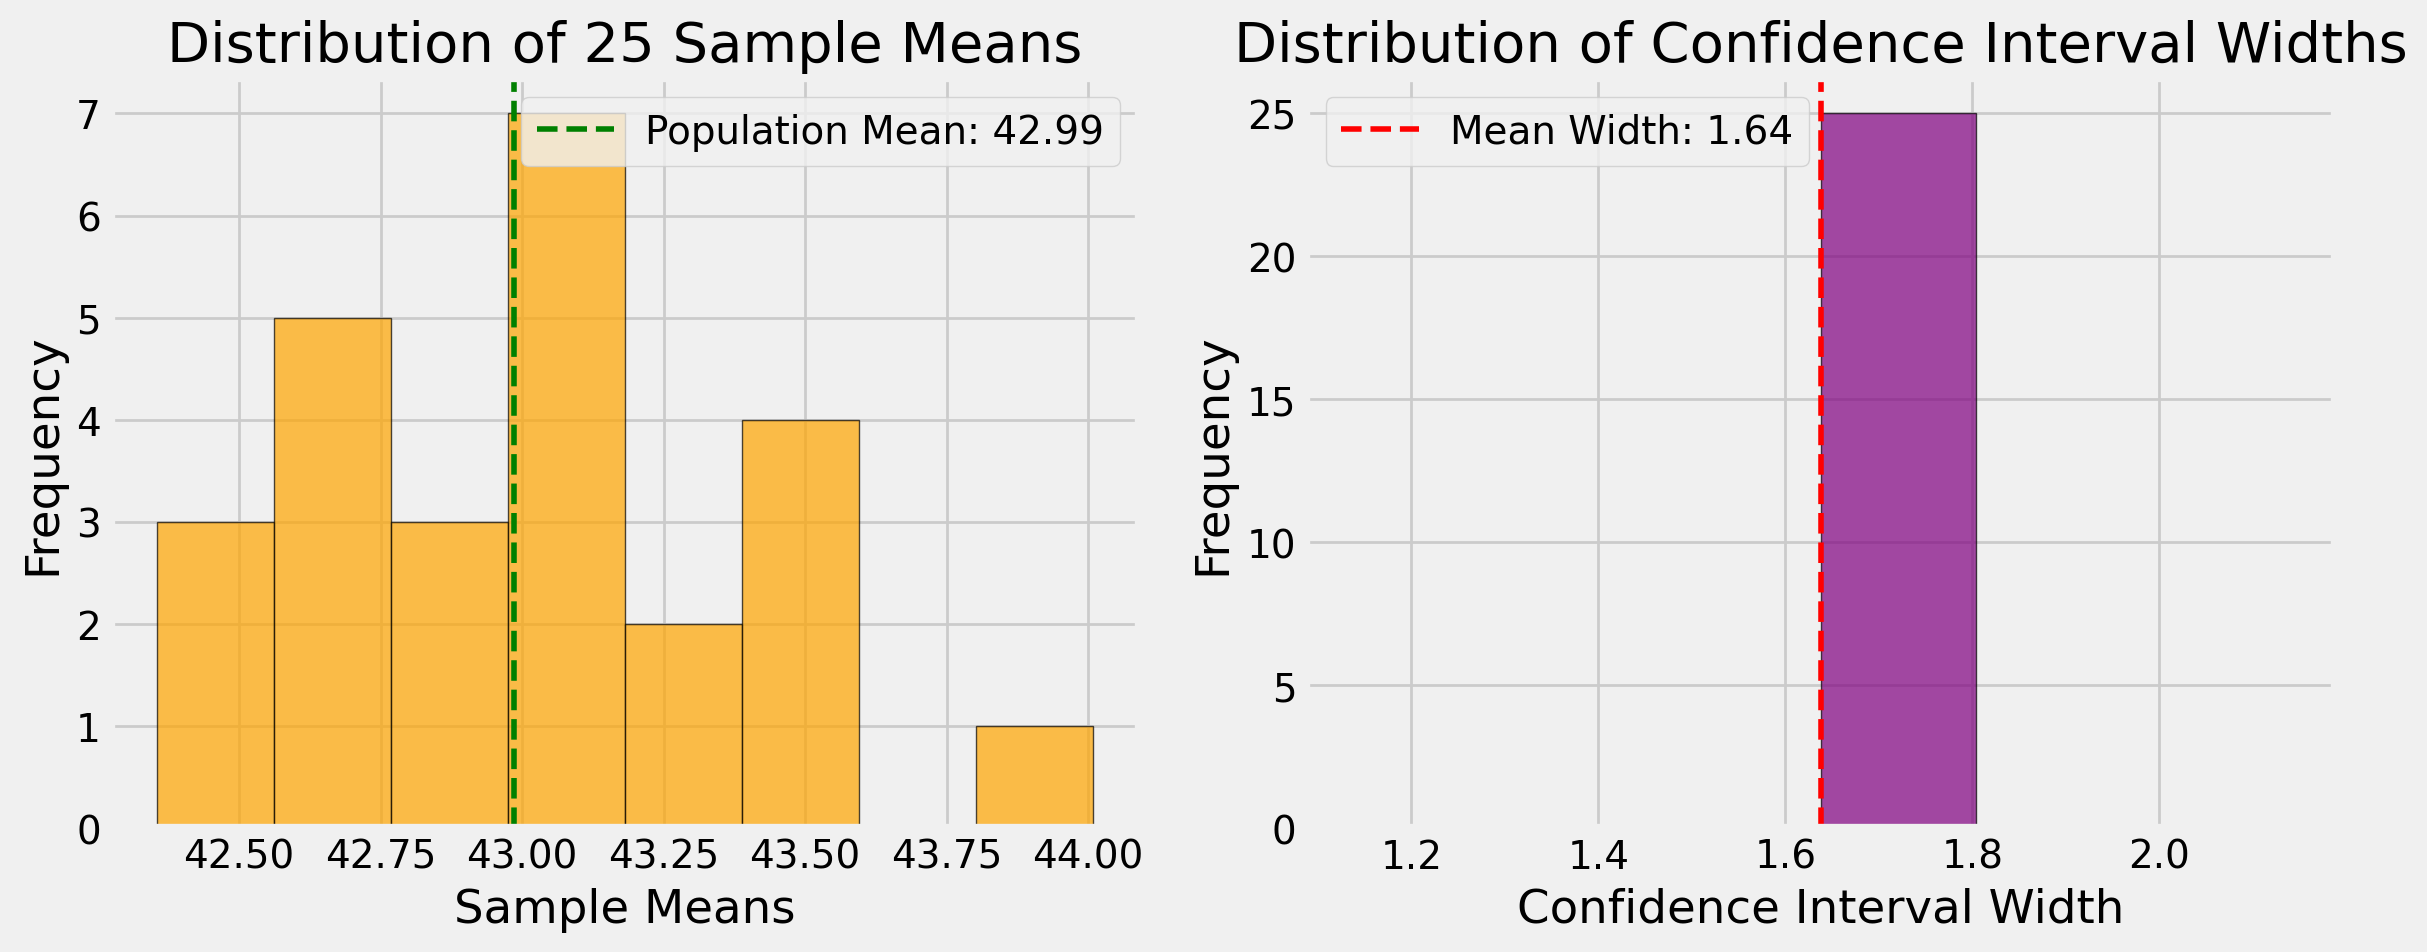


SUMMARY STATISTICS:
Average sample mean: 42.9943
Standard deviation of sample means: 0.3661
Range of sample means: 42.3560 to 44.0080
Average confidence interval width: 1.6377
Theoretical standard error (σ/√n): 0.4178


In [10]:
np.random.seed(12)

# Select the sample size 
sample_size = 1000

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values
for i in range(25):
    # Take a random sample of chosen size 
    sample_data = np.random.choice(population_ages, size=sample_size, replace=False)
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample_data)
    
    sample_mean = sample_data.mean()
    
    # Append sample means and conf intervals for each iteration
    intervals.append(confidence_interval)
    sample_means.append(sample_mean)

# Convert to numpy arrays for easier manipulation
intervals = np.array(intervals)
sample_means = np.array(sample_means)

# Calculate how many intervals contain the true population mean
population_mean = population_ages.mean()
contains_true_mean = np.sum((intervals[:, 0] <= population_mean) & (intervals[:, 1] >= population_mean))

print(f"Population mean: {population_mean:.4f}")
print(f"Number of confidence intervals that contain the population mean: {contains_true_mean}/25")
print(f"Percentage: {contains_true_mean/25*100:.1f}%")

# Visualize all the confidence intervals
plt.figure(figsize=(14, 10))

# Plot each confidence interval
for i, (low, high) in enumerate(intervals):
    # Color based on whether it contains the true mean
    if low <= population_mean <= high:
        color = 'blue'
        plt.plot([low, high], [i, i], color=color, linewidth=3, alpha=0.8)
    else:
        color = 'red'
        plt.plot([low, high], [i, i], color=color, linewidth=3, alpha=0.8)
    
    # Plot the sample mean as a point
    plt.plot(sample_means[i], i, 'o', color=color, markersize=6)

# Plot the true population mean as a vertical line
plt.axvline(x=population_mean, color='green', linestyle='--', linewidth=3, 
            label=f'True Population Mean: {population_mean:.2f}')

# Add labels and title
plt.yticks(range(25), [f'Sample {i+1}' for i in range(25)])
plt.xlabel('Age')
plt.ylabel('Sample Number')
plt.title(f'25 Confidence Intervals (Sample Size = {sample_size})\n{contains_true_mean}/25 ({contains_true_mean/25*100:.0f}%) Contain the True Mean')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Add some statistics to the plot
plt.text(0.02, 0.98, f'Population Mean: {population_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.text(0.02, 0.92, f'Intervals containing true mean: {contains_true_mean}/25', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(0.02, 0.86, f'Sample Size: {sample_size}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

plt.tight_layout()
plt.show()

# Additional analysis - look at the distribution of sample means and interval widths
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample_means, bins=8, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(population_mean, color='green', linestyle='--', linewidth=2, 
            label=f'Population Mean: {population_mean:.2f}')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Distribution of 25 Sample Means')
plt.legend()

plt.subplot(1, 2, 2)
interval_widths = intervals[:, 1] - intervals[:, 0]
plt.hist(interval_widths, bins=6, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(np.mean(interval_widths), color='red', linestyle='--', linewidth=2, 
            label=f'Mean Width: {np.mean(interval_widths):.2f}')
plt.xlabel('Confidence Interval Width')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Interval Widths')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSUMMARY STATISTICS:")
print("=" * 50)
print(f"Average sample mean: {np.mean(sample_means):.4f}")
print(f"Standard deviation of sample means: {np.std(sample_means):.4f}")
print(f"Range of sample means: {np.min(sample_means):.4f} to {np.max(sample_means):.4f}")
print(f"Average confidence interval width: {np.mean(interval_widths):.4f}")
print(f"Theoretical standard error (σ/√n): {population_ages.std()/np.sqrt(sample_size):.4f}")



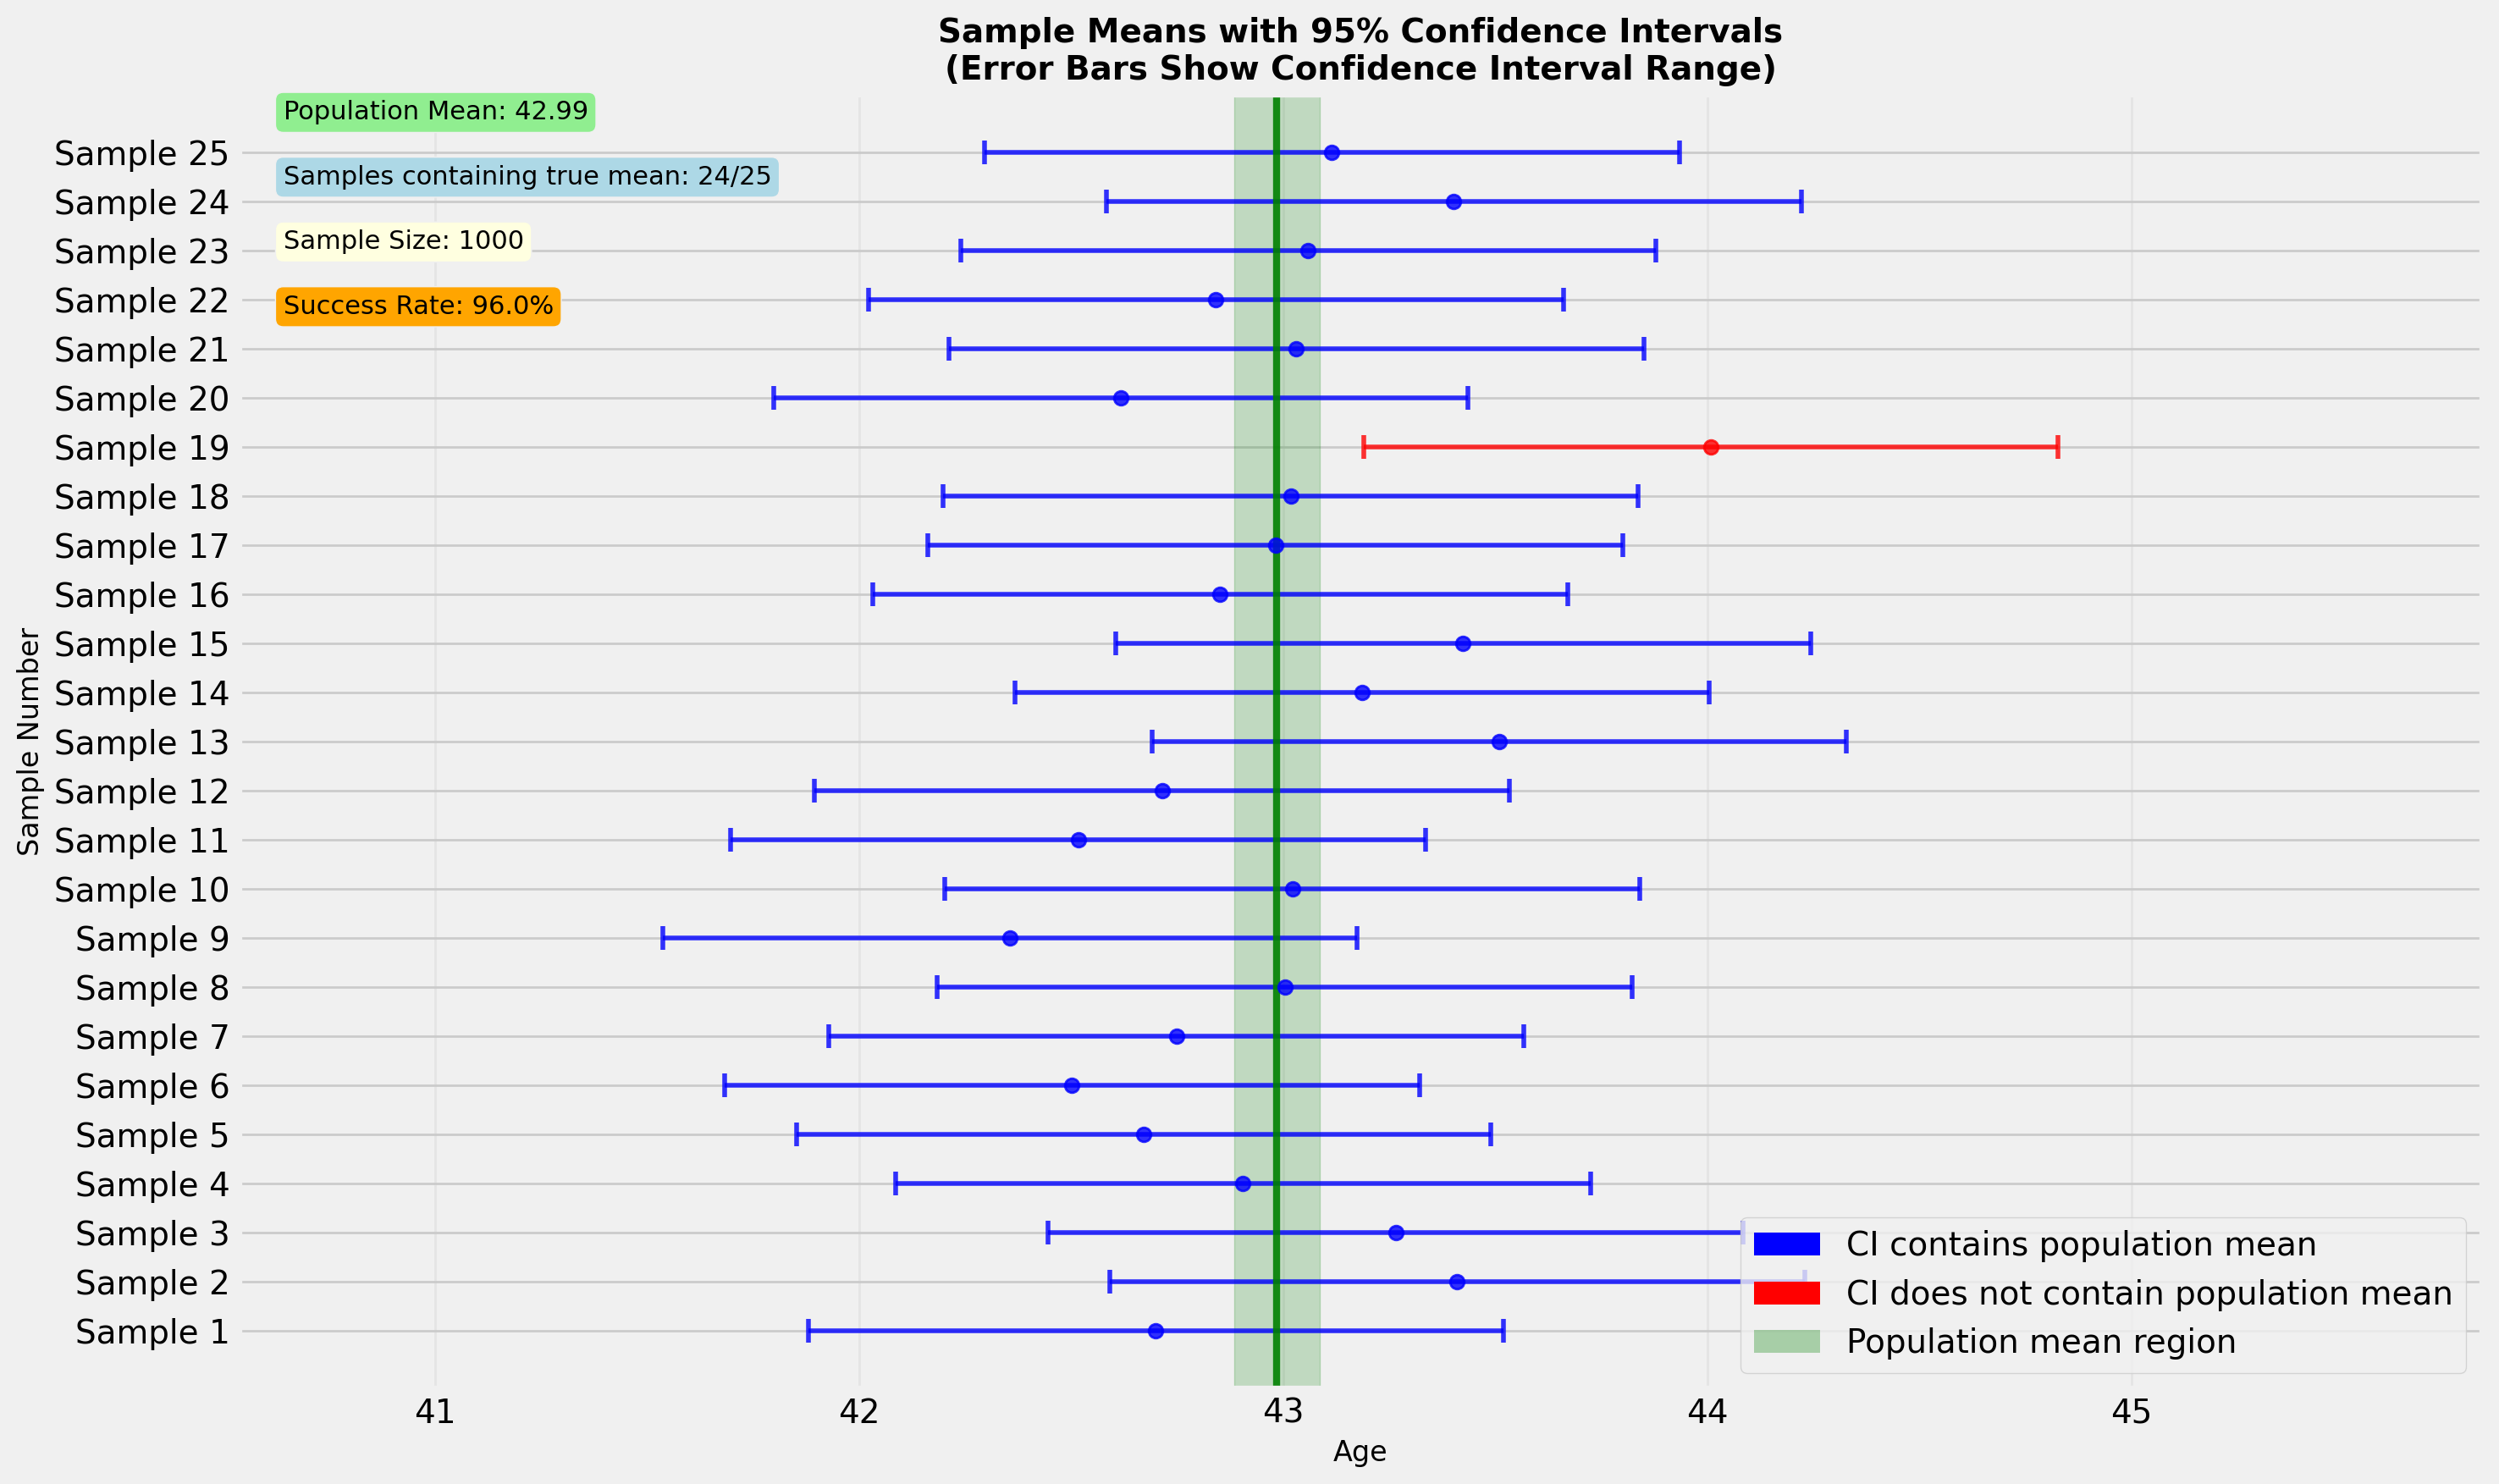

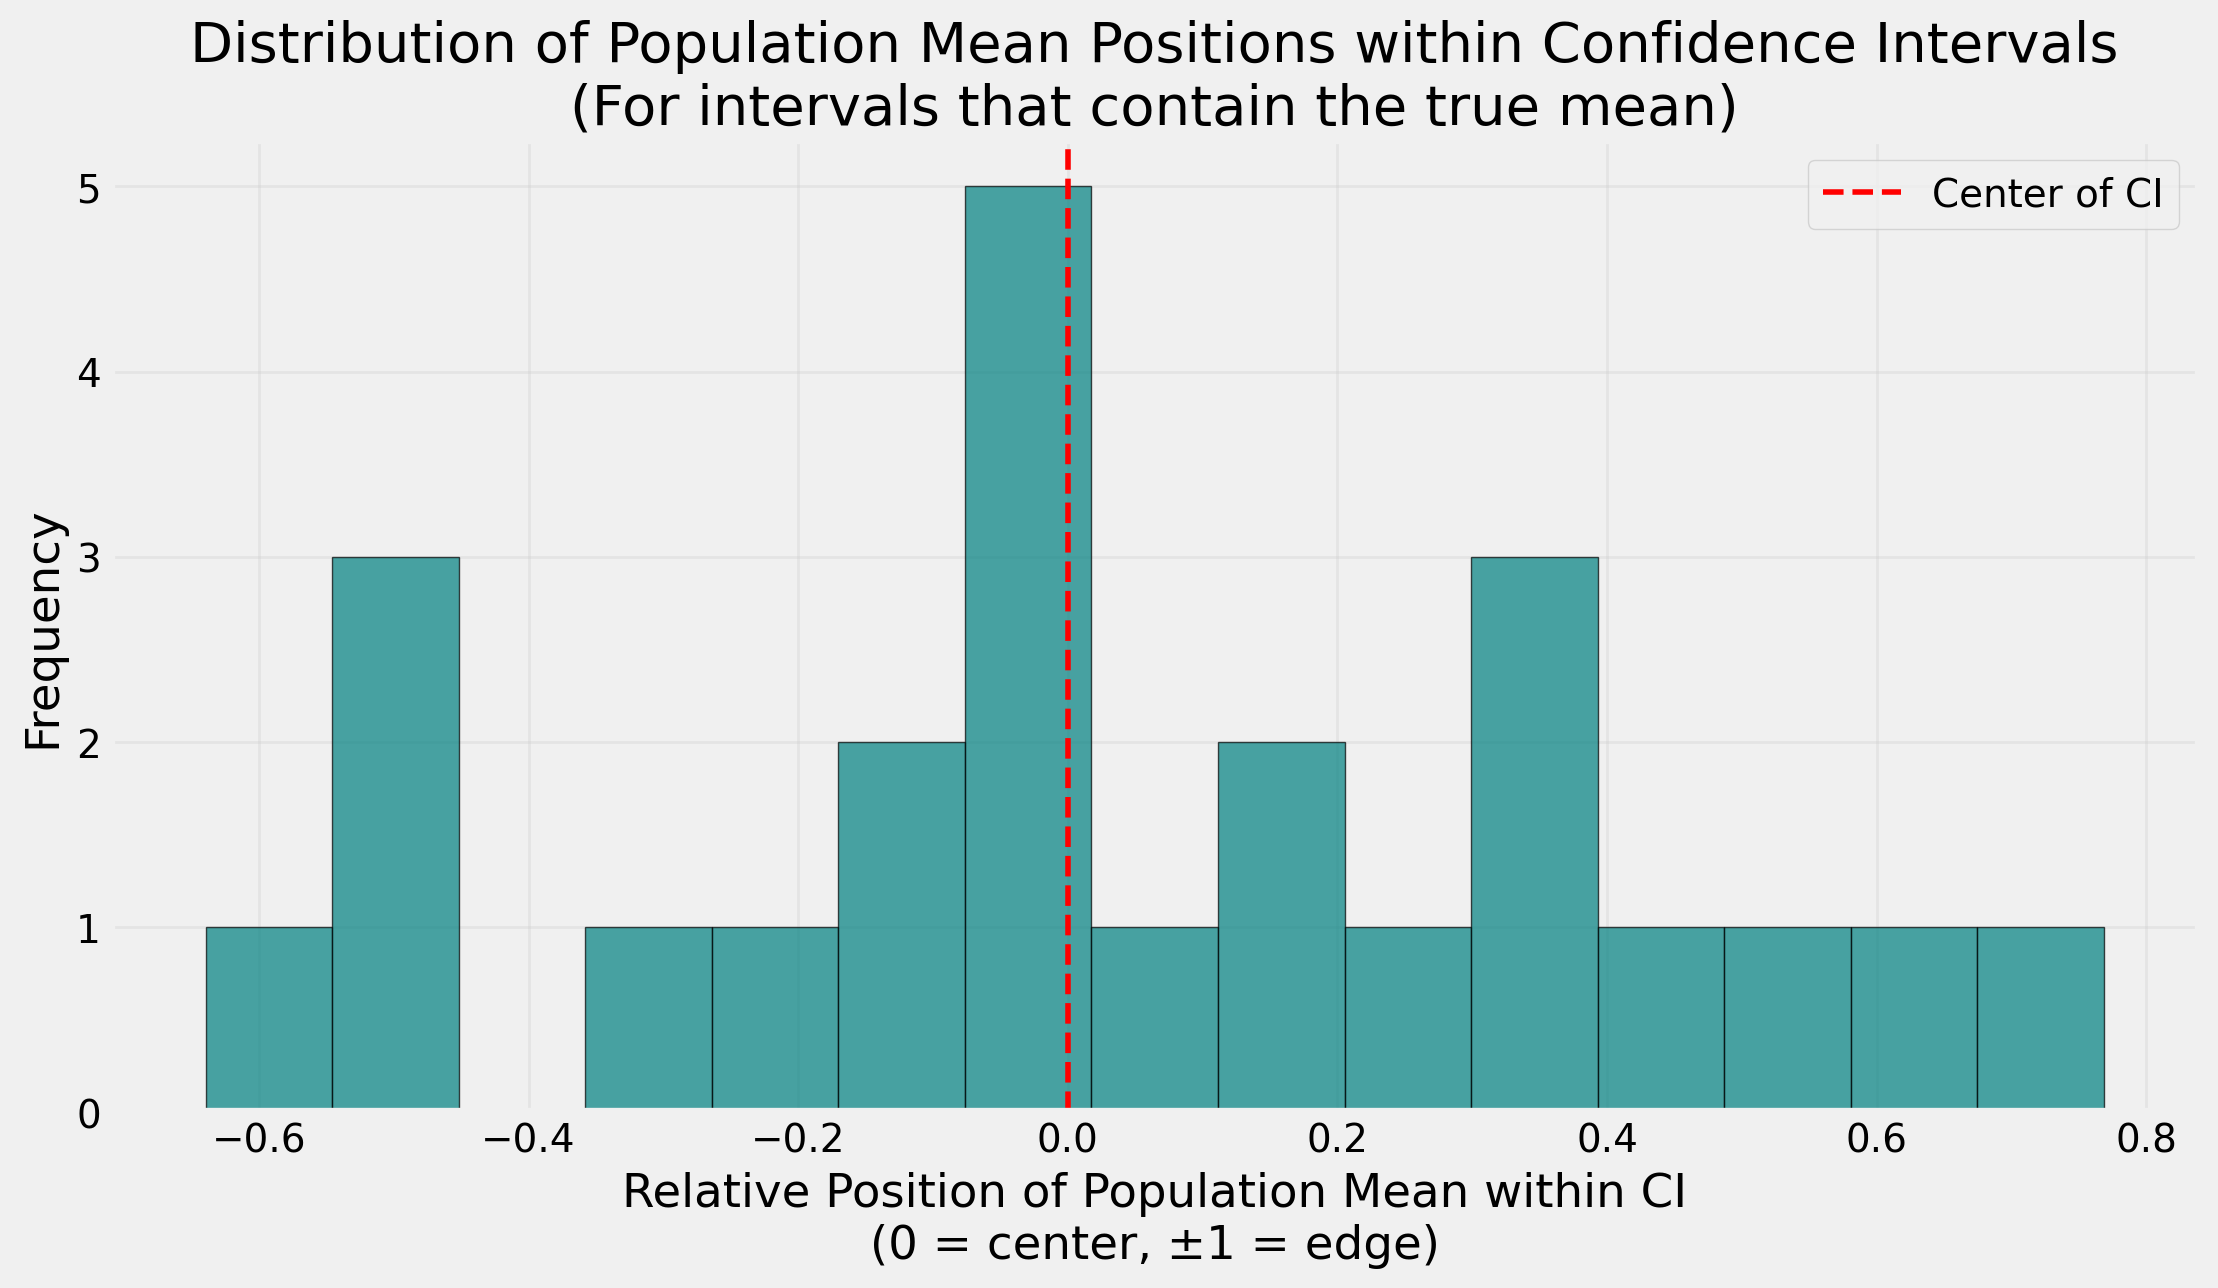

ANALYSIS OF CONFIDENCE INTERVAL COVERAGE:
Expected coverage rate (95% confidence level): 95%
Actual coverage rate: 96.0%
Number of 'missed' intervals: 1
Average CI width: 1.638 years
Range of CI widths: 1.638 to 1.638 years


In [11]:
plt.figure(figsize=(15, 9))

# Create positions for each sample on the y-axis
sample_positions = np.arange(25)

# Plot error bars for each sample
for i in range(25):
    low, high = intervals[i]
    sample_mean = sample_means[i]
    
    # Color based on whether it contains the true mean
    if low <= population_mean <= high:
        color = 'blue'
        cap_color = 'blue'
    else:
        color = 'red'
        cap_color = 'red'
    
    # Plot the error bar
    plt.errorbar(x=sample_mean, y=i, xerr=[[sample_mean - low], [high - sample_mean]], 
                 fmt='o', color=color, ecolor=color, elinewidth=2, capsize=5, capthick=2,
                 markersize=6, alpha=0.8)

# Plot the population mean as a vertical line
plt.axvline(x=population_mean, color='green', linestyle='-', linewidth=3, 
            label=f'Population Mean: {population_mean:.2f}', alpha=0.9)

# Add a shaded region for the population mean (makes it more visible)
plt.axvspan(population_mean - 0.1, population_mean + 0.1, alpha=0.2, color='green')

# Customize the plot
plt.yticks(sample_positions, [f'Sample {i+1}' for i in range(25)])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Sample Number', fontsize=12)
plt.title('Sample Means with 95% Confidence Intervals\n(Error Bars Show Confidence Interval Range)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add legend with custom handles
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='CI contains population mean'),
    Patch(facecolor='red', label='CI does not contain population mean'),
    Patch(facecolor='green', alpha=0.3, label='Population mean region')
]
plt.legend(handles=legend_elements, loc='lower right')

# Add statistics annotations
plt.text(0.02, 0.98, f'Population Mean: {population_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.text(0.02, 0.93, f'Samples containing true mean: {contains_true_mean}/25', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(0.02, 0.88, f'Sample Size: {sample_size}', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
plt.text(0.02, 0.83, f'Success Rate: {contains_true_mean/25*100:.1f}%', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="orange"))

# Adjust x-axis limits to show all error bars clearly
x_margin = 1.0  # Add some margin on both sides
plt.xlim(np.min(intervals) - x_margin, np.max(intervals) + x_margin)

plt.tight_layout()
plt.show()

# Additional analysis: Show the distribution of where the population mean falls within each CI
plt.figure(figsize=(12, 6))

# Calculate relative position of population mean within each CI
relative_positions = []
for low, high in intervals:
    if low <= population_mean <= high:
        # Calculate how far the population mean is from the center, relative to half the width
        center = (low + high) / 2
        half_width = (high - low) / 2
        relative_position = (population_mean - center) / half_width
        relative_positions.append(relative_position)

plt.hist(relative_positions, bins=15, alpha=0.7, color='teal', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Center of CI')
plt.xlabel('Relative Position of Population Mean within CI\n(0 = center, ±1 = edge)')
plt.ylabel('Frequency')
plt.title('Distribution of Population Mean Positions within Confidence Intervals\n(For intervals that contain the true mean)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("ANALYSIS OF CONFIDENCE INTERVAL COVERAGE:")
print("=" * 50)
print(f"Expected coverage rate (95% confidence level): 95%")
print(f"Actual coverage rate: {contains_true_mean/25*100:.1f}%")
print(f"Number of 'missed' intervals: {25 - contains_true_mean}")
print(f"Average CI width: {np.mean(interval_widths):.3f} years")
print(f"Range of CI widths: {np.min(interval_widths):.3f} to {np.max(interval_widths):.3f} years")

Notice that in the plot above, most of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## Interpreting the Confidence Interval

There are two interpretations we can derive from the above simulation, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the mean voter age is between 41.6 and 43.9.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean of population age. 

Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Summary

In this lab, we saw an introduction to confidence intervals and how to construct them from random samples. We also saw how due to the central limit theorem, the mean of sample means tends to be a normal distribution even if the population is bimodal. We also saw how the z-critical value can be used to define the confidence interval based on a confidence level required and the size of samples. We learned how to correctly interpret a confidence interval. 